# Problem Statement 

The  objective is to predict the sales price of a home using Ames Housing Dataset. This is a regression problem since the goal is to predict the sale price of a home. To predict the sales price, we will use numeric and categorical features of the home given in the data.

# 1. Executive Summary:

Using the Ames Housing Dataset that is available on Kaggle, we want to identify which features are the best predictors of housing price and create a regression model that will help us make predictions with the best root mean square value.
The Kaggle challenge offers a train.csv for us to to train our model with, and a test.csv which we will clean and fit the model onto, in order to make our predictions. A csv of the predictions is ultimately uploaded to the Kaggle challenge for scoring.
The model will be tuned closely to the Ames Housing dataset, and we might be able to use our findings from the process to understand what are some key predictors we can use in predicting prices for houses in the United States. However, given that this data set has some features that are very specific to Ames, Iowa (e.g. neighborhood), it will not be perfect fit for other housing data in the U.S.
Steps to follow for this projects:
1.	Understanding the Data
2.  Exploratory Data analysis 
2.	Clean the Null values  
3.	EDA analysis and Feature creation
4.  Convert Categorical to numerical data 
5.	Fit the Regularization models
6.  Test Data Cleaning and Submission to Kaggle 

Personal  kaggle score of:

Private Score: 44555

SalePrice key predictors are: 

- The neighborhood the house is located in
- Overall quality of the house
- Total Square feet area 

In [1]:
# Impot the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# modeling imports
from sklearn.linear_model import LinearRegression ,Ridge, RidgeCV, Lasso, LassoCV
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

#pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

In [2]:
# Reading the training and test data 
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

In [3]:
# To check the shape of train data
train.shape

(2051, 81)

In [4]:
# To check the shape of test data
test.shape

(879, 80)

In [5]:
# To find the dtypes of features in the data 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [6]:
# To find out the counts of the dtypes 
train.dtypes.value_counts()

object     42
int64      28
float64    11
dtype: int64

In [7]:
# To filter Ordinal/Categorical 
train_object = train.select_dtypes('object')

In [8]:
train_object.T

,0,1,2,3,4,5,6,7,8,9,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
MS Zoning,RL,RL,RL,RL,RL,RL,RM,RL,RL,RL,...,RL,RL,RM,RL,RL,RL,RL,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Grvl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Shape,IR1,IR1,Reg,Reg,IR1,IR1,Reg,IR1,Reg,IR1,...,IR1,Reg,Reg,IR1,Reg,IR1,IR1,Reg,Reg,Reg
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,HLS,...,Lvl,Lvl,Lvl,Lvl,Lvl,HLS,Lvl,Bnk,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,...,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub
Lot Config,CulDSac,CulDSac,Inside,Inside,Inside,Corner,Inside,Inside,Inside,Inside,...,Inside,Inside,Inside,Inside,FR2,Inside,Inside,Inside,Corner,Inside
Land Slope,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Sev,...,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,Sawyer,SawyerW,NAmes,Timber,SawyerW,NAmes,Edwards,NAmes,OldTown,NAmes,...,NridgHt,Edwards,BrkSide,SawyerW,NridgHt,Timber,Edwards,Crawfor,NAmes,Gilbert
Condition 1,RRAe,Norm,Norm,Norm,Norm,PosA,Norm,Norm,Artery,Norm,...,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm


In [9]:
# To filter the numeric feature
train_numeric = train.select_dtypes(exclude=object)

In [10]:
# To check the values of the numeric features 
round(train_numeric.describe().T,3)

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439810e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700900e+01,4.282400e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905500e+01,2.326100e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112000e+00,1.426000e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562000e+00,1.104000e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017800e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103600e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969600e+01,1.749630e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [11]:
#Decided to drop PID as both Id and PID are unique values for 2051 rows 
train = train.drop(['PID'],axis=1)
test = test.drop(['PID'],axis=1)

In [12]:
# Replace the column name with lower string and replace '' to _ 
train.columns = [x.lower().replace(' ','_') for x in train.columns]
test.columns = [x.lower().replace(' ','_') for x in test.columns]

In [13]:
# Set id as index 
train.set_index('id',inplace= True)
test.set_index('id', inplace= True)

#### Data consist of 2051 rows of observations that is broken down into 80 separate information of a housing with sale price included.

The columns can be classified into numerical (int or float types) and categorical (object type). Categorical features can be further subdivided into descriptive (eg. Neighbourhood and MS Zoning) and ordinal (eg. ExterQual and ExterCond).

dtypes of features are appropriately assigned, except for MS SubClass which should be object, not int. We will still keep it as int for analysis.


|Feature|Variable type|Datatype|Description|
|:------|:-------|:-------|:-----|
|id|Discrete|int|Observation number|
|pid|Nominal|int|Parcel identification number|
|ms_subclass|Nominal|int|Identifies the type of dwelling involved in the sale|
|ms_zoning|Nominal|object|Identifies the general zoning classification of the sale|
|lot_frontage|Continuous|float|Linear feet of street connected to property
|lot_area|Continuous|int|Lot size in square feet|
|street|Nominal|object|Type of road access to property|
|alley|Nominal|object|Type of alley access to property|
|lot_shape|Ordinal|object|General shape of property|
|land_contour|Nominal|object|Flatness of the property|
|utilities|Ordinal|object|Type of utilities available|
|lot_config|Nominal|object|Lot configuration|
|land_slope|Ordinal|object|Slope of property|
|neighborhood|Nominal|object|Physical locations within Ames city limits|
|condition_1|Nominal|object|Proximity to various conditions|
|condition_2|Nominal|object|Proximity to various conditions (if more than one is present)|
|bldg_type|Nominal|object|Type of dwelling|
|house_style|Nominal|object|Style of dwelling|
|overall_qual|Ordinal|int|Rates the overall material and finish of the house|
|overall_cond|Ordinal|int|Rates the overall condition of the house|
|year_built|Discrete|int|Original construction date|
|year_remod/add|Discrete|int|Remodel date (same as construction date if no remodeling or additions)|
|roof_style|Nominal|object|Type of roof|
|roof_matl|Nominal|object|Roof material|
|exterior_1st|Nominal|object|Exterior covering on house|
|exterior_2nd|Nominal|object|Exterior covering on house (if more than one material)|
|mas_vnr_type|Nominal|object|Masonry veneer type|
|mas_vnr_area|Continuous|float|Masonry veneer area in square feet|
|exter_qual|Ordinal|object|Evaluates the quality of the material on the exterior|
|exter_cond|Ordinal|object|Evaluates the present condition of the material on the exterior|
|foundation|Nominal|object|Type of foundation|
|bsmt_qual|Ordinal|object|Evaluates the height of the basement|
|bsmt_cond|Ordinal|object|Evaluates the general condition of the basement|
|bsmt_exposure|Ordinal|object|Refers to walkout or garden level walls|
|bsmtfin_type_1|Ordinal|object|Rating of basement finished area|
|bsmtfin_sf_1|Continuous|float|Type 1 finished square feet|
|bsmtfin_type_2|Ordinal|object|Rating of basement finished area (if multiple types)|
|bsmtfin_sf_2|Continuous|float|Type 1 finished square feet|
|bsmt_unf_sf|Continuous|float|Unfinished square feet of basement area|
|total_bsmt_sf|Continuous|float|Total square feet of basement area|
|heating|Nominal|object|Type of heating|
|heating_qc|Ordinal|object|Heating quality and condition|
|central_air|Nominal|object|Central air conditioning
|electrical|Ordinal|object|Electrical system|
|1st_flr_sf|Continuous|int|First Floor square feet|
|2nd_flr_sf|Continuous|int|Second floor square feet|
|low_qual_fin_sf|Continuous|int|Low quality finished square feet (all floors)|
|gr_liv_area|Continuous|int|Above grade (ground) living area square feet
|bsmt_full_bath|Discrete|float|Basement full bathrooms|
|bsmt_half_bath|Discrete|float|Basement half bathrooms|
|full_bath|Discrete|int|Full bathrooms above grade|
|half_bath|Discrete|int|Half baths above grade|
|bedroom_abvgr|Discrete|int|Bedrooms above grade (does NOT include basement bedrooms)|
|kitchen_abvgr|Discrete|int|Kitchens above grade|
|kitchen_qual|Ordinal|object|Kitchen quality|
|totrms_abvgrd|Discrete|int|Total rooms above grade (does not include bathrooms)|
|functional|Ordinal|object|Home functionality (Assume typical unless deductions are warranted)|
|fireplaces|Discrete|int|Number of fireplaces|
|fireplace_qu|Ordinal|object|Fireplace quality|
|garage_type|Nominal|object|Garage location|
|garage_yr_blt|Discrete|float|Year garage was built|
|garage_finish|Ordinal|object|Interior finish of the garage|
|garage_cars|Discrete|float|Size of garage in car capacity|
|garage_area|Continuous|float|Size of garage in square feet|
|garage_qual|Ordinal|object|Garage quality|
|garage_cond|Ordinal|object|Garage condition|
|paved_drive|Ordinal|object|Paved driveway|
|wood_deck_sf|Continuous|int|Wood deck area in square feet|
|open_porch_sf|Continuous|int|Open porch area in square feet|
|enclosed_porch|Continuous|int|Enclosed porch area in square feet|
|3ssn_porch|Continuous|int|Three season porch area in square feet|
|screen_porch|Continuous|int|Screen porch area in square feet|
|pool_area|Continuous|int|Pool area in square feet|
|pool_qc|Ordinal|object|Pool quality|
|fence|Ordinal|object|Fence quality|
|misc_feature|Nominal|object|Miscellaneous feature not covered in other categories|
|misc_val|Continuous|int|$Value of miscellaneous feature|
|mo_sold|Discrete|int|Month Sold (MM)|
|yr_sold|Discrete|int|Year Sold (YYYY)|
|sale_type|Nominal|object|Type of sale|
|saleprice|Continuous|int|Sale price $$|

# 2 . Exploratory Data Analysis

## Since the main goal over here is to predict  the Saleprice of the house, It is important to look at the distribution of Saleprice. 

1.5575514385863427


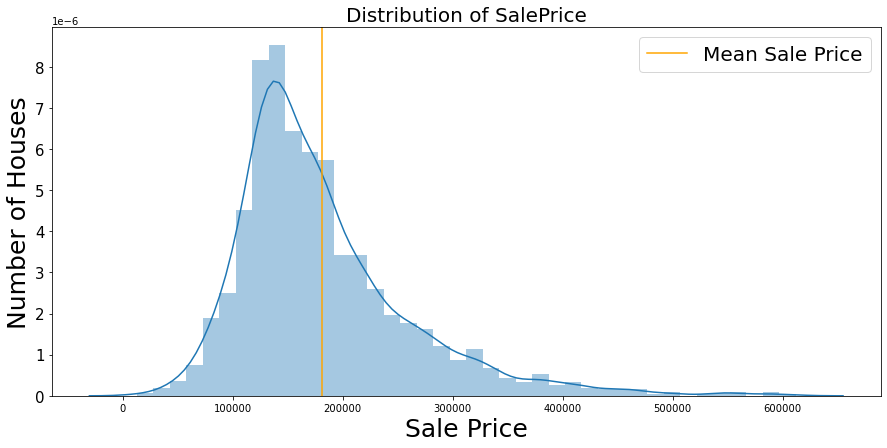

In [14]:
# Ploting the Saleprice distribution plot
plt.figure(figsize =(12,6))
sns.distplot(train['saleprice'], kde= True, bins=40)
plt.tight_layout()
plt.title('Distribution of SalePrice', fontsize = 20);
plt.legend({'Mean':train['saleprice'].mean()}, fontsize=14);
plt.yticks(fontsize=15)
plt.xlabel('Sale Price', fontsize=25)
plt.ylabel('Number of Houses', fontsize=25)
plt.axvline(train.saleprice.mean(), color='orange', label='Mean Sale Price')
plt.legend(fontsize=20);
# plt.savefig('../viz_exports/distribution.png');
print(train['saleprice'].skew())

### Observation:
From the describe and distribution plot, we can see the Average  sale price is 181484, with a large standard deviation of 79248. Price ranging from 12789 to 6116570. The median sales price was 162500, which is slightly below the average sales price.The distribution for sale price doesn't look normal and it is skewed positive.

## 3. Data cleaning - find the null values 

### We will look into the features with null values to imputate with the right value. 

In [15]:
#Define a function to filter the features with null values >0
def null_values(df):
    null_df= train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending =False)
    return print(null_df)
null_values(train)

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_yr_blt      114
garage_cond        114
garage_qual        114
garage_finish      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmt_cond           55
bsmt_qual           55
bsmtfin_type_1      55
mas_vnr_type        22
mas_vnr_area        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_cars          1
bsmtfin_sf_1         1
bsmtfin_sf_2         1
bsmt_unf_sf          1
garage_area          1
total_bsmt_sf        1
dtype: int64


#### Taking the bottom up approach to first imputate the features with lower null values.

In [16]:
# Define a unique value count function:
def uniquevalues(df,lst):
        for i in lst:
            val_count = df[i].unique()
            print(i)
            print(val_count)

In [17]:
# Started with the lower null value features, which are related to each other 
#Garage area and Garage cars
train[train["garage_area"].isnull()].iloc[:,train.columns.get_loc("garage_area"):]

,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,
2237,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


#### There is only 1 null value in Garage area and Garage cars which belongs to same row - will map it with the right value

In [18]:
# Garage area is a continuous feature - imputate with 0.0 
train['garage_area'].fillna(0.0,inplace=True)

In [19]:
uniquevalues(train,['garage_cars'])

garage_cars
[ 2.  1.  3.  0.  4.  5. nan]


In [20]:
# Garage cars is a discrete feature - will replace it with 0.0 
train['garage_cars'].fillna(0.0,inplace=True)

## Mapping the null values of basement null values 

In [21]:
# Lock the row with basefin_type_2
train[train['bsmtfin_sf_1'].isnull()].iloc[:,train.columns.get_loc('bsmtfin_sf_1'):]

,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,
1342,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [22]:
# Lock the row with bsmt_half_bath
train[train['bsmt_full_bath'].isnull()].iloc[:,train.columns.get_loc('bsmt_full_bath'):]

,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,
1498,NaN,NaN,3,1,5,1,Ex,11,Typ,2,...,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
1342,NaN,NaN,1,0,2,1,TA,4,Typ,0,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [23]:
# Seems Bsmt_half_bath and Bsmt_full-bath belongs to the same same row and discrete feature, will imputate with 0.0 
#'bsmtfin_sf_2','bsmt_unf_sf'& total_bsmt_sf are all belong to the same row and continuous data, will imputate it with 0.0
# Make a list of all featires and imputate it with 0.0
lst_bsmt = ['bsmt_half_bath','bsmt_full_bath','bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf']

In [24]:
# These bastmt features are nominal values so decided to fill them with 0.0
for i in lst_bsmt:
    train[i] = train[i].fillna(0.0)

In [25]:
df = pd.DataFrame(null_values(train))
df

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_yr_blt      114
garage_finish      114
garage_qual        114
garage_cond        114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmtfin_type_1      55
bsmt_cond           55
bsmt_qual           55
mas_vnr_area        22
mas_vnr_type        22
dtype: int64


""


### Mapping the null values of Mas_Vnr_area and Mas_Vnr_type

In [26]:
#  Checking if rows with "Mas Vnr Area" = NaN also have "Mas Vnr Types" = NaN (no area provided since no veneer type)

train[train["mas_vnr_type"].isnull()].iloc[:,train.columns.get_loc("mas_vnr_type"):]

,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,
2393,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,Unf,0.0,...,0,0,NaN,NaN,NaN,0,7,2006,New,344133
2383,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386.0,...,0,0,NaN,NaN,NaN,0,9,2006,New,465000
539,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,...,0,0,NaN,NaN,NaN,0,8,2009,WD,184900
518,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,...,0,0,NaN,NaN,NaN,0,10,2009,New,225000
2824,NaN,NaN,TA,TA,PConc,Gd,TA,Av,GLQ,475.0,...,0,0,NaN,NaN,NaN,0,4,2006,WD,117250
1800,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,GLQ,745.0,...,0,0,NaN,NaN,NaN,0,12,2007,New,310013
1455,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804.0,...,0,0,NaN,NaN,NaN,0,3,2008,WD,237000
1120,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666.0,...,0,0,NaN,NaN,NaN,0,8,2008,WD,247000
1841,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106.0,...,0,0,NaN,NaN,NaN,0,11,2007,New,199900


In [27]:
 # Imputate the mas_vnr_type with None which is nominal data with some none value and 0.0 for Ma_vnr_area which is continuous feature
train['mas_vnr_type'] = train['mas_vnr_type'].fillna("None")
train['mas_vnr_area'] = train['mas_vnr_area'].fillna(0.0)

In [28]:
# confirming and checking null values 
null_values(train)

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_cond        114
garage_qual        114
garage_finish      114
garage_yr_blt      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmtfin_type_1      55
bsmt_cond           55
bsmt_qual           55
dtype: int64


### Mapping the null values of Basement features >50 null values 

In [29]:
#  Taking Bsmt Exposure to check whether it is related to other null values related to bsmt 
train.loc[train["bsmt_exposure"].isnull(),'bsmt_qual':]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,
807,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,...,0,0,NaN,NaN,NaN,0,6,2009,WD,131000
811,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,...,0,0,NaN,GdPrv,NaN,0,6,2009,WD,118858
781,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,...,0,0,NaN,NaN,NaN,0,6,2009,WD,63900
888,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,...,0,0,NaN,NaN,NaN,0,7,2009,ConLD,198500
1554,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,...,0,0,NaN,NaN,NaN,0,2,2008,WD,13100
2740,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,...,348,0,NaN,NaN,NaN,0,4,2006,WD,135000
2242,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,...,0,0,NaN,NaN,NaN,0,3,2007,WD,68104
2745,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,...,0,0,NaN,NaN,NaN,0,4,2006,WD,93000
84,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,...,0,0,NaN,NaN,NaN,0,4,2010,WD,112000


In [30]:
# Most of the rows are with 0 basmt_area which means there is no bsmt. 
# There are only 3 extra null values with bsmt_exposure value, which is for Unf (unfurnished basement). 
lst =['bsmt_exposure','bsmtfin_type_2','bsmtfin_type_1','bsmt_qual','bsmt_cond']
uniquevalues(train,lst)

bsmt_exposure
['No' 'Gd' 'Av' nan 'Mn']
bsmtfin_type_2
['Unf' 'Rec' nan 'BLQ' 'GLQ' 'LwQ' 'ALQ']
bsmtfin_type_1
['GLQ' 'Unf' 'ALQ' 'Rec' nan 'BLQ' 'LwQ']
bsmt_qual
['TA' 'Gd' 'Fa' nan 'Ex' 'Po']
bsmt_cond
['TA' 'Gd' nan 'Fa' 'Po' 'Ex']


In [31]:
# Replacing these ordinal or categorical features of basement with 'None'
for i in lst:
    train[i].fillna('None', inplace= True)

In [32]:
# Verify the null values  
null_values(train)

pool_qc          2042
misc_feature     1986
alley            1911
fence            1651
fireplace_qu     1000
lot_frontage      330
garage_cond       114
garage_qual       114
garage_finish     114
garage_yr_blt     114
garage_type       113
dtype: int64


## Mapping the null values of Garage features  > 144 null values

In [33]:
# Filter to check the rows which hasnull value. 
train.loc[train['garage_cond'].isnull() & train['garage_type'],'garage_type':]

,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,
2237,Detchd,NaN,NaN,0.0,0.0,NaN,NaN,Y,174,0,...,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In [34]:
# Filter to check the rows which has garage cond N no null value and columns related to it 
train.loc[train['garage_cond'].isnull(),'garage_type':]

,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,
2243,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,...,0,0,NaN,NaN,NaN,0,6,2007,WD,119600
330,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,200,26,...,0,0,NaN,NaN,NaN,0,3,2010,WD,76000
2278,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,30,...,0,0,NaN,NaN,NaN,0,12,2007,New,147000
2235,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,...,0,0,NaN,NaN,NaN,0,9,2007,WD,129850
2084,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,...,0,0,NaN,NaN,NaN,0,7,2007,WD,86000
728,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,36,...,0,0,NaN,NaN,NaN,0,9,2009,WD,44000
781,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,...,0,0,NaN,NaN,NaN,0,6,2009,WD,63900
1492,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,144,0,...,0,0,NaN,NaN,NaN,0,7,2008,WD,108000
1514,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,...,0,0,NaN,NaN,NaN,0,4,2008,WD,98000


#### Observation:
All the Garage features are related with garage_area 0.0, which implies there is no garage 

In [35]:
# Confirming on the value counts of Garage cond and related features
lst=['garage_cond', 'garage_finish', 'garage_qual','garage_type']
uniquevalues(train,lst)

garage_cond
['TA' 'Fa' nan 'Po' 'Gd' 'Ex']
garage_finish
['RFn' 'Unf' 'Fin' nan]
garage_qual
['TA' 'Fa' nan 'Gd' 'Ex' 'Po']
garage_type
['Attchd' 'Detchd' 'BuiltIn' 'Basment' nan '2Types' 'CarPort']


In [36]:
# imputating the null values to None for ordinal n ordered features:
for i in lst:
    train[i].fillna('None',inplace=True)

# Imputed to null for build year
train['garage_yr_blt'].fillna( 0.0, inplace= True)

In [37]:
#Confirming the null values 
null_values(train)

pool_qc         2042
misc_feature    1986
alley           1911
fence           1651
fireplace_qu    1000
lot_frontage     330
dtype: int64


#### Lot Frontage (Continuous): is a Linear feet of street connected to property which could be an one of the key feature for  finding the Saleprice

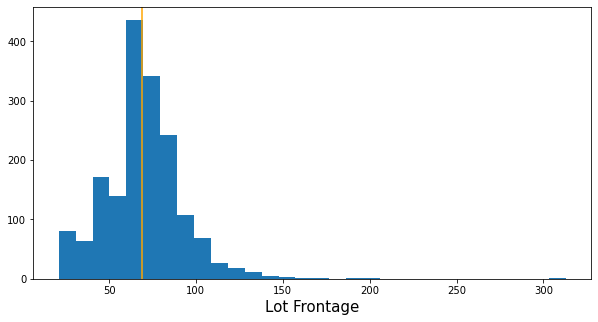

In [38]:
# Plot the hist to see the spread
plt.figure(figsize=(10,5))
plt.hist(train['lot_frontage'], bins=30,)
plt.xlabel('Lot Frontage', fontsize=15);
plt.axvline(train.lot_frontage.mean(), color='orange', label='Mean Sale Price')
plt.show()

#### Observation: 
Lot frontage has positively skewed distribution, instead of imputating it with 0.0, it is better to impute with mean value of it. 

In [39]:
# Mean value of lot_frontage
mean = np.mean(train['lot_frontage'])

In [40]:
# Imputatin the lot_frontage
train["lot_frontage"].fillna(mean, inplace = True)

### Features with >1000 null values decided to keep them and imputate with related value 

In [41]:
#Finding the unique value of features
lst=['alley','fence','misc_feature','pool_qc','fireplace_qu']
uniquevalues(train,lst)

alley
[nan 'Pave' 'Grvl']
fence
[nan 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']
misc_feature
[nan 'Shed' 'TenC' 'Gar2' 'Othr' 'Elev']
pool_qc
[nan 'Fa' 'Gd' 'Ex' 'TA']
fireplace_qu
[nan 'TA' 'Gd' 'Po' 'Ex' 'Fa']


In [42]:
# Replacing alley with NA when there is no alley
# Fill null values to No for all null values -assuming data is missing when no fence
# Misc_Features replacing with NA when is none type
# Pool QC fill with NA when there is no pool 

train["alley"].fillna("None", inplace = True)
train["fence"].fillna("No", inplace = True)
train["misc_feature"].fillna("NA", inplace = True)
train["pool_qc"].fillna("None", inplace = True)
train["fireplace_qu"].fillna("None", inplace = True)

In [43]:
null_values(train)

Series([], dtype: int64)


## Converting the  ordinal features to the numerical values 

Ordinal data types changed to numerical data

- Pool_QC
- Exter Qual
- Exter Cond
- Bsmt Qual
- Bsmt Cond
- Fireplace Qu 
- Garage Qual
- Garage Cond
- Heating QC
- Kitchen Qual
- Fence
- Lot Shape
- Utilities
- Land slope
- Electrical
- Paved drive
- Garage finish

In [44]:
# Checking the unique values of ordinal features
lst_ordinal = ['pool_qc','exter_qual','exter_cond','bsmt_qual','bsmt_cond','heating_qc','kitchen_qual','fireplace_qu','garage_qual','garage_cond']
uniquevalues(train,lst_ordinal)

pool_qc
['None' 'Fa' 'Gd' 'Ex' 'TA']
exter_qual
['Gd' 'TA' 'Ex' 'Fa']
exter_cond
['TA' 'Gd' 'Fa' 'Ex' 'Po']
bsmt_qual
['TA' 'Gd' 'Fa' 'None' 'Ex' 'Po']
bsmt_cond
['TA' 'Gd' 'None' 'Fa' 'Po' 'Ex']
heating_qc
['Ex' 'TA' 'Gd' 'Fa' 'Po']
kitchen_qual
['Gd' 'TA' 'Fa' 'Ex']
fireplace_qu
['None' 'TA' 'Gd' 'Po' 'Ex' 'Fa']
garage_qual
['TA' 'Fa' 'None' 'Gd' 'Ex' 'Po']
garage_cond
['TA' 'Fa' 'None' 'Po' 'Gd' 'Ex']


In [45]:
# Mapping the ordinal to numerical values
for i in lst_ordinal:
        train[i] = train[i].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
# Bst_Exposure Imputation.
train['bsmt_exposure'] = train['bsmt_exposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'None':0})

In [46]:
# Confirming the change 
train.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,
109,60,RL,69.0552,13517,Pave,None,IR1,Lvl,AllPub,CulDSac,...,0,0,0,No,NA,0,3,2010,WD,130500
544,60,RL,43.0000,11492,Pave,None,IR1,Lvl,AllPub,CulDSac,...,0,0,0,No,NA,0,4,2009,WD,220000
153,20,RL,68.0000,7922,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,0,No,NA,0,1,2010,WD,109000
318,60,RL,73.0000,9802,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,0,No,NA,0,4,2010,WD,174000
255,50,RL,82.0000,14235,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,0,No,NA,0,3,2010,WD,138500


In [47]:
# Ordinal to numeric data for other categorical features
lst =['fence','lot_shape','utilities','land_slope','electrical','paved_drive','garage_finish']
uniquevalues(train,lst)

fence
['No' 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']
lot_shape
['IR1' 'Reg' 'IR2' 'IR3']
utilities
['AllPub' 'NoSeWa' 'NoSewr']
land_slope
['Gtl' 'Sev' 'Mod']
electrical
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
paved_drive
['Y' 'N' 'P']
garage_finish
['RFn' 'Unf' 'Fin' 'None']


In [48]:
# Imputating the ordinal features 
train['fence'] = train['fence'].map({'No':0, 'MnWw': 1, 'GdWo': 2, 'MnPrv':3, 'GdPrv':4})
train['lot_shape'] = train['lot_shape'].map({'IR3':1, 'IR2':2, 'IR1':3, 'Reg':4})
train['utilities'] = train['utilities'].map({'NoSeWa':1, 'NoSewr':2, 'AllPub':3})
train['land_slope'] = train['land_slope'].map({'Sev':1, 'Mod':2, 'Gtl':3})
train['electrical'] = train['electrical'].map({'Mix':1, 'FuseP':2, 'FuseF':3, 'FuseA':4, 'SBrkr':5})
train['paved_drive'] = train['paved_drive'].map({'N':0, 'P':1, 'Y':2})
train['garage_finish'] = train['garage_finish'].map({'None':0, 'Unf':1, 'RFn':2, 'Fin':3})

In [49]:
# Confirm the columns after imputating the value 
train.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,
109,60,RL,69.0552,13517,Pave,None,3,Lvl,3,CulDSac,...,0,0,0,0,NA,0,3,2010,WD,130500
544,60,RL,43.0000,11492,Pave,None,3,Lvl,3,CulDSac,...,0,0,0,0,NA,0,4,2009,WD,220000
153,20,RL,68.0000,7922,Pave,None,4,Lvl,3,Inside,...,0,0,0,0,NA,0,1,2010,WD,109000
318,60,RL,73.0000,9802,Pave,None,4,Lvl,3,Inside,...,0,0,0,0,NA,0,4,2010,WD,174000
255,50,RL,82.0000,14235,Pave,None,3,Lvl,3,Inside,...,0,0,0,0,NA,0,3,2010,WD,138500


In [50]:
train.to_csv('./datasets/train_cleaned.csv')

# 4. Exploratory Data Analysis 

### For numeric data, find the correlation of features against Saleprice

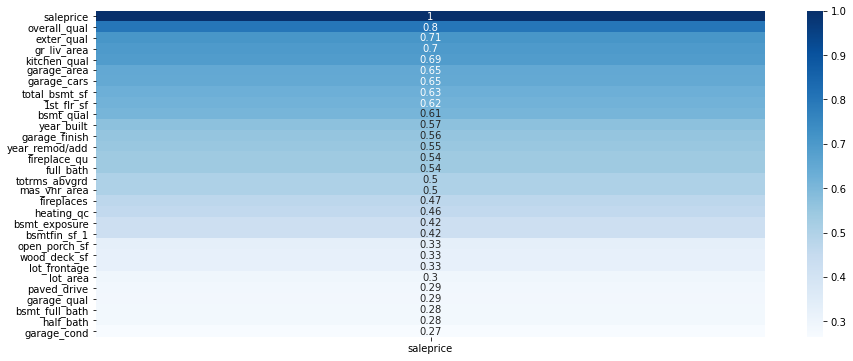

In [51]:
# Variables has highest positive correlation against Sale Price
plt.figure(figsize = (15,6))
train_corr = train.corr()[['saleprice']].sort_values('saleprice', ascending=False)
positive_corr = train_corr.head(30)

sns.heatmap(positive_corr, annot = True, cmap='Blues');

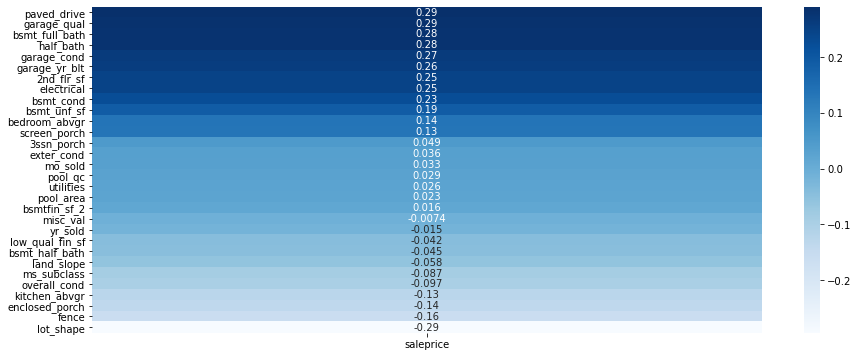

In [52]:
# Variables has highest negative correlation against Sale Price
plt.figure(figsize = (15,6))
train_corr = train.corr()[['saleprice']].sort_values('saleprice', ascending=False)
positive_corr = train_corr.tail(30)

sns.heatmap(positive_corr, annot = True, cmap='Blues');

### Observation: Heatmap shows salesprice is strongly correlated with overall_qual and year_build, year_remold and total area.There are some negative correlated features, but they are not highly negative correlated 

## Feature Engineering

### Heatmap shows some of the features are positive correlated and we need to improve 
Looking at the heatmap has also given us additional ideas in terms of dropping or merging other features.
Floor Area == total_bsmt_sf(0.63) + 1st_flr_sf(0.62) + bstm_sf_1 +2nd_flr_sf (0.25)

*we are ignoring the features that pertain to basement floor quality e.g. bsmtfin_sf_1 which is Type 1 finished square feet

Correlation witn 2nd floor is lower than 0.3, still keeping it as it may give better corelation with the total surface area
Bathrooms

### Creating the feature with full bath and half bath 
Floor_area = full_bath (0.6) + half_bath (0.24)
feature created to see the trend which gives us a stronger correlation score


### Creating the feature with yr_sold and yr_built 
Age = yr_sold(-0.015) - year_built(0.57)



### Creating the feature with year_remod/add and yr_built
rebuilt age = rebuild_age(-0.015) - year_built(0.55)
feature created to see the trend which gives us a stronger correlation score

We will run the heatmap again.

In [53]:
# Created a total surface area feature 
train["total_sf"] = train["total_bsmt_sf"] + train["1st_flr_sf"] + train["2nd_flr_sf"]

#calculating overall number of bathrooms
train["total_baths"] = train["full_bath"] + train["half_bath"]

In [54]:
# Created a feature with age and rebuld_age 
train['age'] = (train['yr_sold'] - train['year_built'])
train['rebuild_age'] = (train['yr_sold'] - train['year_remod/add'])

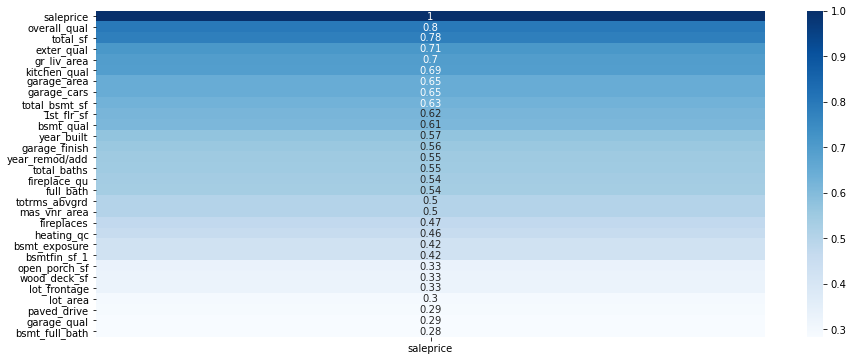

In [55]:
# Variables has highest positive correlation against Sale Price
plt.figure(figsize = (15,6))
train_corr = train.corr()[['saleprice']].sort_values('saleprice', ascending=False)
positive_corr = train_corr.head(30)

sns.heatmap(positive_corr, annot = True, cmap='Blues');

In [56]:
# Scatter plot Function to plot the Saleprice 
def snsscat(data, independentcol, title=None, x_label=None, y_label=None,figuresize = None, columns = 2):
    rows = int(round((len(independentcol)/columns),0)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=rows, ncols=columns, figsize = figuresize) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    fig.subplots_adjust(hspace = 0.4, wspace = 0.3)
    for i, column in enumerate(independentcol): # Gives us an index value to get into all our lists
        try:
            sns.regplot(x=column,y='saleprice', data=data, ax=ax[i])
        except: 
            pass
    plt.show()

In [57]:
# Plotted the sctter plot to see the correlation treand with some of the highly correlated features.
feature_numeric = ['age','total_baths','rebuild_age','overall_qual','exter_qual','gr_liv_area','total_sf',
                   'garage_area','mas_vnr_area','fireplaces']

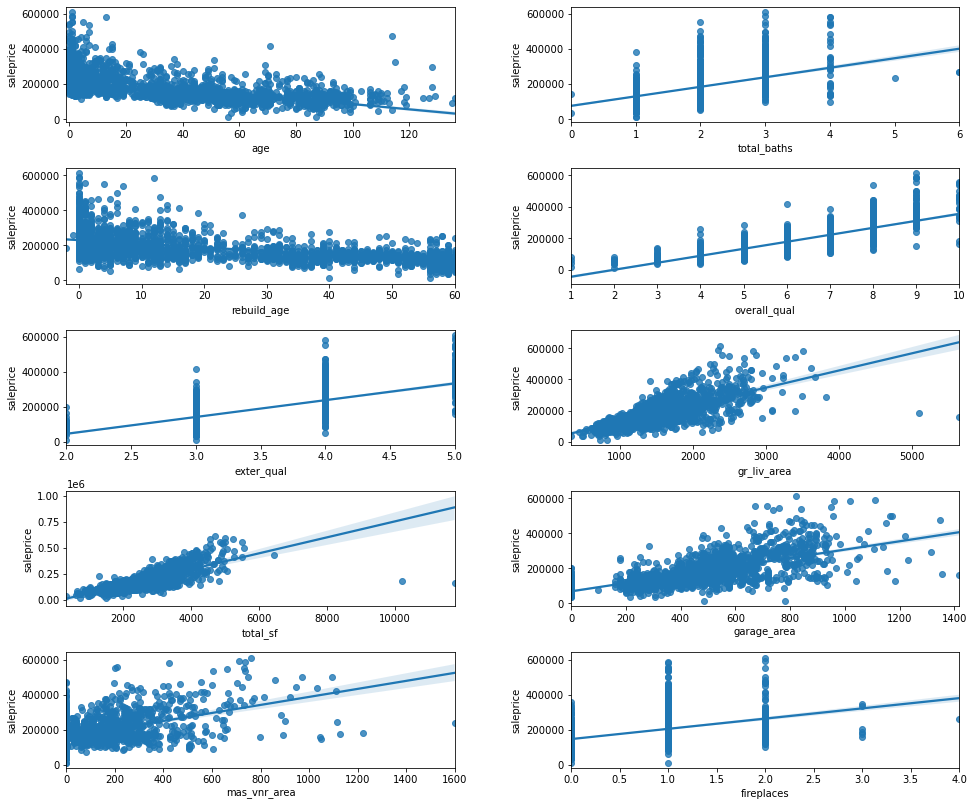

In [58]:
snsscat(train, feature_numeric,x_label=feature_numeric, figuresize=(16,14))

### Observation:
Total_quality, total Square feet area and Garage area, age of the are some of the key features for determining the house price.Decided to drop the features which has lower than +/- 0.5 correlation.

In [59]:
# Creating the mask for the 
mask = list(train.corr()['saleprice'] <= 0.5) & (train.corr()['saleprice'] >= -0.5)

In [60]:
#creating a list of the columns return from the above mask
drop_list = list(train.corr()['saleprice'][mask].keys())

In [61]:
# Checking the drop list 
drop_list

['ms_subclass',
 'lot_frontage',
 'lot_area',
 'lot_shape',
 'utilities',
 'land_slope',
 'overall_cond',
 'exter_cond',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_sf_1',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'heating_qc',
 'electrical',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'fireplaces',
 'garage_yr_blt',
 'garage_qual',
 'garage_cond',
 'paved_drive',
 'wood_deck_sf',
 'open_porch_sf',
 'enclosed_porch',
 '3ssn_porch',
 'screen_porch',
 'pool_area',
 'pool_qc',
 'fence',
 'misc_val',
 'mo_sold',
 'yr_sold']

In [62]:
# Dropping the numerical features
train.drop(drop_list,axis=1, inplace= True)

In [63]:
# Check the shape of the training data 
train.shape

(2051, 45)

In [64]:
train.corr()[['saleprice']].sort_values('saleprice', ascending=False).head(30)

,saleprice
saleprice,1.000000
overall_qual,0.800207
total_sf,0.783108
exter_qual,0.712146
gr_liv_area,0.697038
kitchen_qual,0.692336
garage_area,0.649897
garage_cars,0.647781
total_bsmt_sf,0.629303
1st_flr_sf,0.618486


In [65]:
# Decided to drop the correlated feature on which the feature engineering was done as they are correlated 
drop_features = ['total_bsmt_sf','1st_flr_sf','year_built', 'full_bath']

In [66]:
# Drop the correlated features 
train.drop(columns= drop_features, axis=1, inplace= True)

In [67]:
# Check the shape
train.shape

(2051, 41)

## Categorical Features Visualization

### Intuitively, the house’s neighbourhood felt like a relevant predictor for Sale Price, so I used boxplot to visualise this relationship.  This visualisation illustrated variation in Sale Price and a good distribution in the number of properties across the 25 neighbourhoods. 

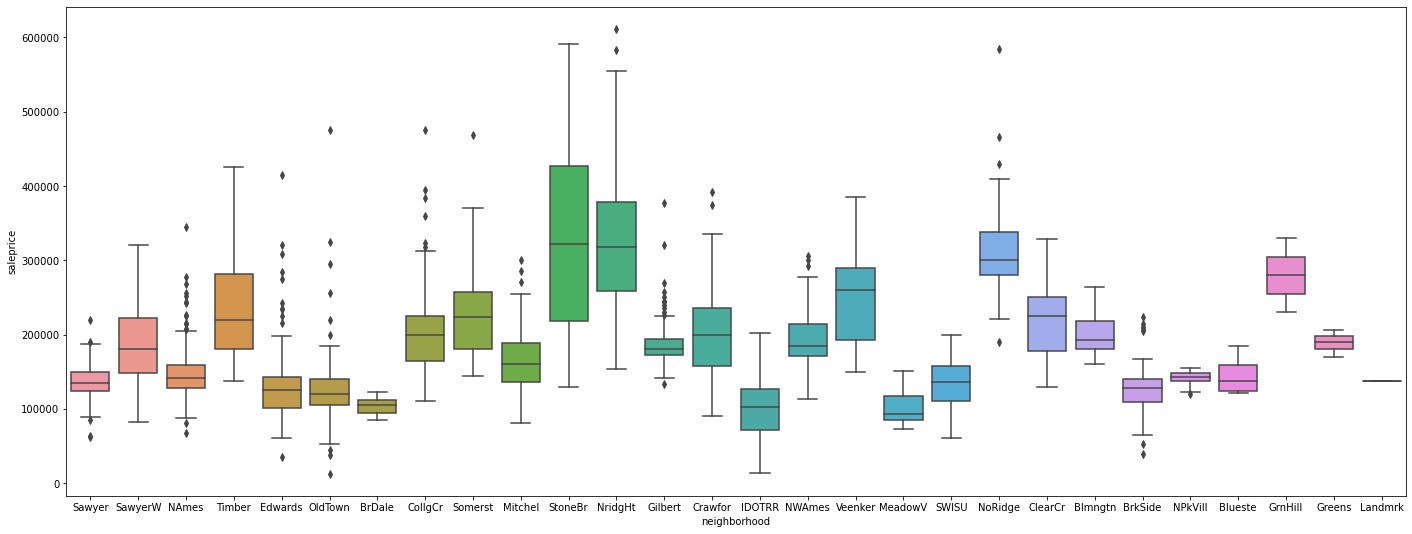

In [68]:
#Visual representation of the distribution of the sales by neighborhood
plt.figure(figsize=(24,9))
sns.boxplot(y='saleprice', x='neighborhood', data=train)

## Observation:Neighbourhood vs Saleprice boxplot clearly shows that it is a strong predictor of the saleprice 

In [69]:
def snsbox(data, independentcol, title=None, x_label=None, y_label=None,figuresize = None, columns = 2):
    rows = int(round((len(independentcol)/columns),0)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=rows, ncols=columns, figsize = figuresize) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    fig.subplots_adjust(hspace = 0.4, wspace = 0.2)
    for i, column in enumerate(independentcol): # Gives us an index value to get into all our lists
        try:
            sns.boxplot(x=column,y='saleprice', data=data, ax=ax[i])
        except: 
            pass
    plt.show()

In [70]:
# To filter Categorical/Nominal data 
train_object = train.select_dtypes('object')

In [71]:
# Define a unique value countfunction:
def valuecounts(df,lst):
        for i in lst:
            val_count = df[i].value_counts()
            print(i)
            print(val_count)

In [72]:
valuecounts(train,train_object)

ms_zoning
RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: ms_zoning, dtype: int64
street
Pave    2044
Grvl       7
Name: street, dtype: int64
alley
None    1911
Grvl      85
Pave      55
Name: alley, dtype: int64
land_contour
Lvl    1843
HLS      85
Bnk      80
Low      43
Name: land_contour, dtype: int64
lot_config
Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: lot_config, dtype: int64
neighborhood
NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
Timber      48
NoRidge     48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
Veenker     17
NPkVill     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: neighborhood, dtype: int64
condition_1
Norm      1767
Feedr   

## With the value counts observation of the categorical features, decided to drop some of the features which are dominated by the one type 
Eg:
- Ms-zoning which has RL - 1598,
- Street 
- Alley  
- Land contour 
- Condition 1
- Condition 2
- bldg_type
- roof_style 
- bsmtfin_type_2
- heating
- functional
- central_air 
- garage_type
- functional 
- misc_feature

In [73]:
# Created the list of features to be dropped
list_drop_cat = ['ms_zoning', 'street', 'alley','land_contour','condition_1','condition_2','bldg_type',
            'roof_style', 'roof_matl', 'bsmtfin_type_2','heating','functional', 'central_air', 'garage_type', 'misc_feature']

In [74]:
# Drop the columsn 
train.drop(columns=list_drop_cat, axis=1, inplace =True)

In [75]:
# Checking the shape after dropping some of the features
train.shape

(2051, 26)

In [76]:
train_object= train.select_dtypes('object').columns

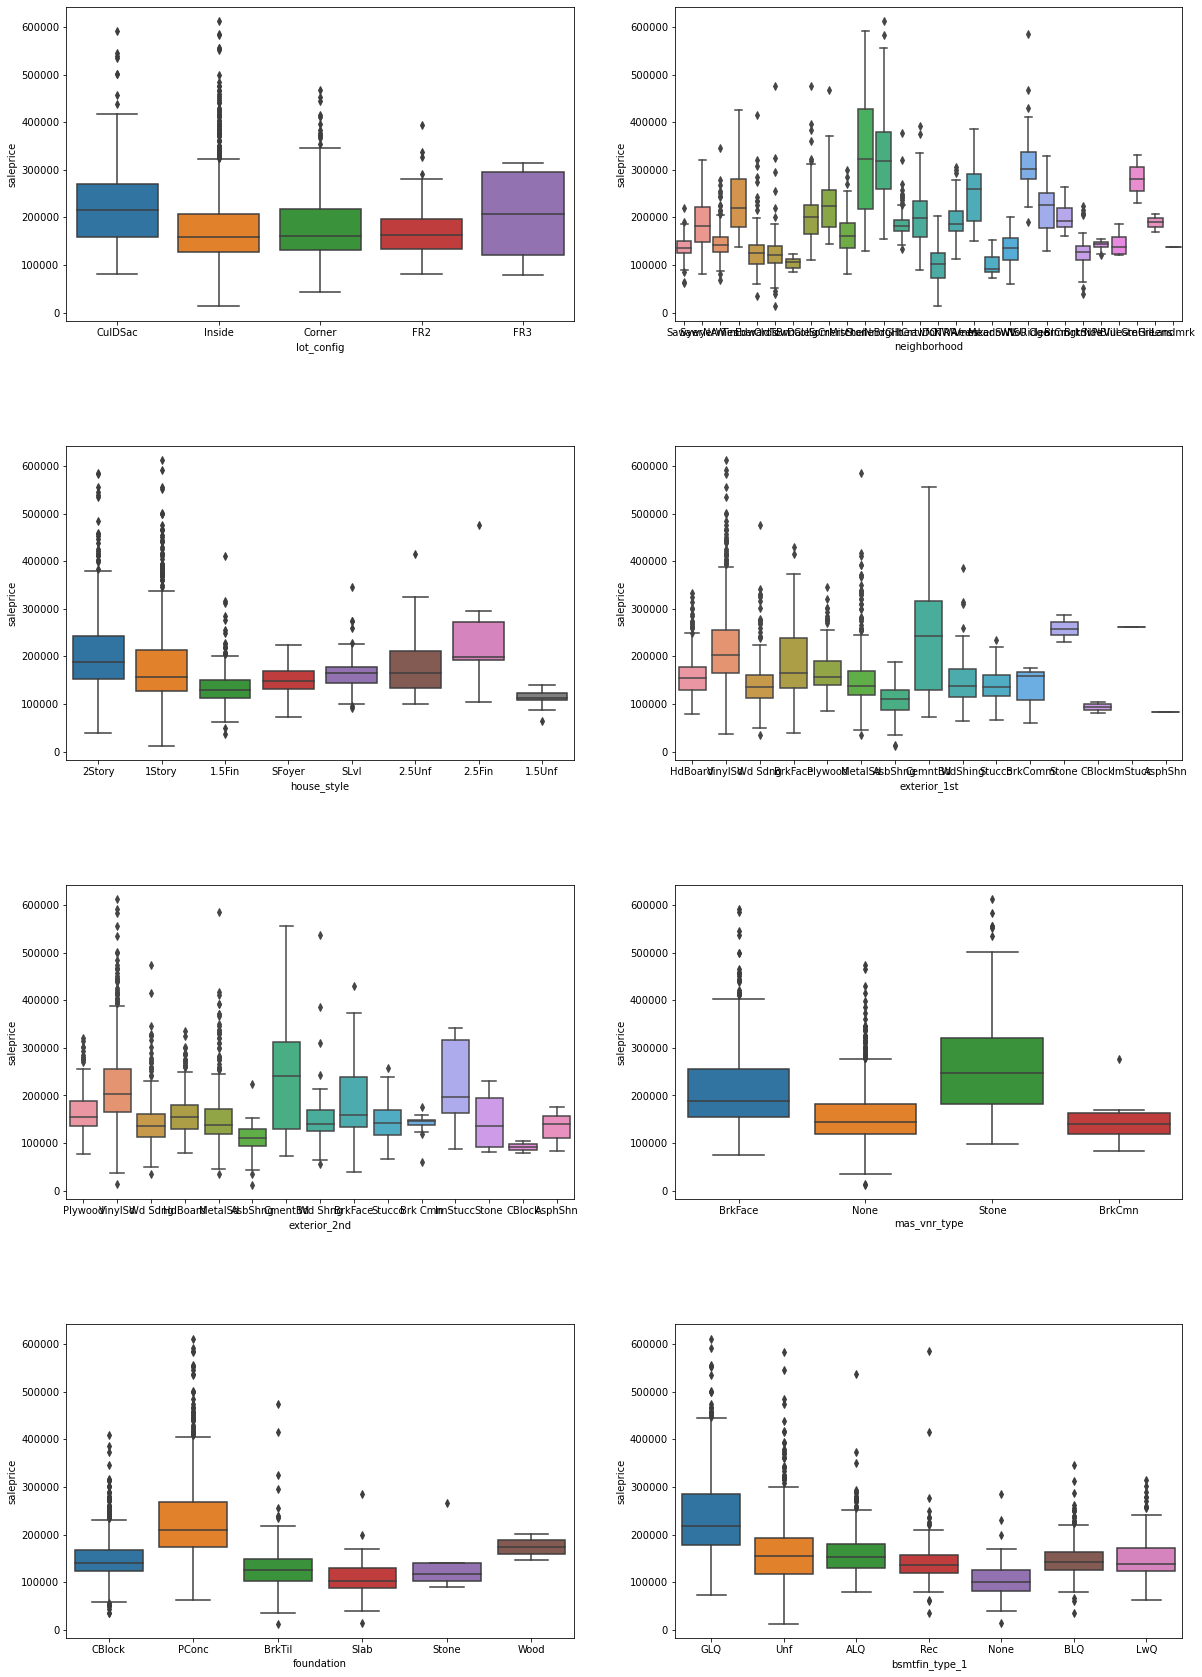

In [77]:
# Boxplot to check the relavant categorical features
snsbox(train,train_object, x_label=train_object, figuresize=(20,30))

### Observation: 
    - Box plot of Categorical data shows very low variance in the sales price with alley, central air, misc_feature,heating, functional, bsmtfin_type_1, bsmt_type_2
    -  - Lot contour an lot config and condition on the house are some of the key features for determining the house price.

In [78]:
# Find the categorical features
train_object

Index(['lot_config', 'neighborhood', 'house_style', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'foundation', 'bsmtfin_type_1',
       'sale_type'],
      dtype='object')

#### Dummy creation for some of the Categorical columns 

In [79]:
#Create dummies for selected dummies for categorical variables

train = pd.get_dummies(train, columns=train_object,
                                         drop_first=True)

In [80]:
# Comfirm the changes
train.head()

,overall_qual,year_remod/add,mas_vnr_area,exter_qual,bsmt_qual,gr_liv_area,kitchen_qual,totrms_abvgrd,fireplace_qu,garage_finish,...,bsmtfin_type_1_Rec,bsmtfin_type_1_Unf,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
id,,,,,,,,,,,,,,,,,,,,,
109,6,2005,289.0,4,3,1479,4,6,0,2,...,0,0,0,0,0,0,0,0,0,1
544,7,1997,132.0,4,4,2122,4,8,3,2,...,0,0,0,0,0,0,0,0,0,1
153,5,2007,0.0,3,3,1057,4,5,0,1,...,0,0,0,0,0,0,0,0,0,1
318,5,2007,0.0,3,4,1444,3,7,0,3,...,0,1,0,0,0,0,0,0,0,1
255,6,1993,0.0,3,2,1445,3,6,0,1,...,0,1,0,0,0,0,0,0,0,1


In [81]:
#Check the shape
train.shape

(2051, 105)

# 5. Regression Modelling 

In [82]:
# Creating the features for the model 
features = [col for col in train._get_numeric_data().columns if col != 'saleprice']
X = train[features]
y=train['saleprice']

In [83]:
# Run the train test split on the training data  
X_train, X_val,y_train,y_val = train_test_split(X,y,random_state=42)

In [84]:
# fit a standard scaler to X_train and transform both X_train and X_test
ss =StandardScaler()
ss.fit(X_train)
X_train_ss = ss.transform(X_train)
X_val_ss = ss.transform(X_val)

## Linear Regression Model 

In [85]:
# Instantiate the models
lr = LinearRegression()

In [86]:
# Linear Regression
lr.fit(X_train_ss,y_train)
lr_scores = cross_val_score(lr, X_train_ss, y_train, cv=5)
lr_cv_mse_scores = -cross_val_score(lr, X_train_ss, y_train, cv=5, scoring = 'neg_mean_squared_error')
print(lr_scores.mean())
print(lr_cv_mse_scores.mean())

-3.103227467189083e+25
1.9820846568530094e+35


## LASSO AND RIDGE REGRESSION

In [87]:
# Instantiate the LASSO and Ridge Regression Model
lasso = LassoCV(n_alphas = 100)
ridge = RidgeCV(alphas = np.linspace(.1, 10, 100))

In [88]:
# Ridge
# Find optimal value for ridge regression alpha
ridge_alphas = np.logspace(0, 5, 200)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train_ss, y_train)
print (optimal_ridge.alpha_)

387.20387818125573


In [89]:
# Cross-validate the Ridge regression with the optimal alpha.
ridge = Ridge(alpha=optimal_ridge.alpha_)
ridge_scores = cross_val_score(ridge, X_train_ss, y_train, cv=5)
print(ridge_scores.mean())
ridge_cv_mse_scores = -cross_val_score(ridge,X_train_ss,y_train,cv=5, scoring ='neg_mean_squared_error')
print(ridge_cv_mse_scores.mean())

0.8288356529970524
1071688857.5477035


In [90]:
# Find optimal value for lasso regression alpha
optimal_lasso = LassoCV(n_alphas=100, cv=10, verbose=1)
optimal_lasso.fit(X_train_ss, y_train)

print (optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

314.9892652960008


.....................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished


In [91]:
# Lasso Model
lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso_scores = cross_val_score(lasso, X_train_ss, y_train, cv=5)
print(lasso_scores.mean())
lasso_cv_mse_scores = -cross_val_score(lasso,X_train_ss,y_train,cv=5, scoring ='neg_mean_squared_error')
print(lasso_cv_mse_scores.mean())

0.8228635546747991
1099001735.757443


In [92]:
# Printing Linear Regression Values 
print( "Training R2 (LR)" + str(lr.score(X_train_ss,y_train)))
print( "Testing R2 (LR)" + str(lr.score(X_val_ss,y_val)))
print( "Estimate of R2 (LR)" + str(lr.score(X_val_ss,y_val).mean()))
print("Training MSE(LR) " + str(mean_squared_error(y_train, lr.predict(X_train_ss))))
print("Testing MSE(LR) " + str(mean_squared_error(y_val,lr.predict(X_val))))
print("Estimate of Testing RMSE (LR)" + str(np.sqrt(lr_cv_mse_scores.mean())))

Training R2 (LR)0.8588337550589051
Testing R2 (LR)0.86499862494633
Estimate of R2 (LR)0.86499862494633
Training MSE(LR) 892808771.4632381
Testing MSE(LR) 3274651418986569.0
Estimate of Testing RMSE (LR)4.452060934952496e+17


In [93]:
# Printing the Ridge Regression Values 
print( "Training R2 (Ridge)" + str(optimal_ridge.score(X_train_ss,y_train)))
print( "Testing R2 (Ridge)" + str(optimal_ridge.score(X_val_ss,y_val)))
print( "Estimate of R2 (Ridge)" + str(optimal_ridge.score(X_val_ss,y_val).mean()))
print("Training MSE(Ridge) " + str(mean_squared_error(y_train, optimal_ridge.predict(X_train_ss))))
print("Testing MSE(Ridge) " + str(mean_squared_error(y_val,optimal_ridge.predict(X_val))))
print("Estimate of Testing RMSE (Ridge)" + str(np.sqrt(ridge_cv_mse_scores.mean())))

Training R2 (Ridge)0.8518685805923867
Testing R2 (Ridge)0.8623382857122411
Estimate of R2 (Ridge)0.8623382857122411
Training MSE(Ridge) 936860158.2595239
Testing MSE(Ridge) 1753025852687502.8
Estimate of Testing RMSE (Ridge)32736.659230100184


In [94]:
print( "Training R2 (Lasso)" + str(optimal_lasso.score(X_train_ss,y_train)))
print( "Testing R2 (Lasso)" + str(optimal_lasso.score(X_val_ss,y_val)))
print( "Estimate of R2 (Lasso)" + str(optimal_lasso.score(X_val_ss,y_val).mean()))
print("Training MSE(Lasso) " + str(mean_squared_error(y_train, optimal_lasso.predict(X_train_ss))))
print("Testing MSE(Lasso) " + str(mean_squared_error(y_val,optimal_lasso.predict(X_val))))
print("Estimate of Testing RMSE (Lasso)" + str(np.sqrt(lasso_cv_mse_scores.mean())))

Training R2 (Lasso)0.8556014433895045
Testing R2 (Lasso)0.8666428144876794
Estimate of R2 (Lasso)0.8666428144876794
Training MSE(Lasso) 913251591.9954981
Testing MSE(Lasso) 2010669281939862.8
Estimate of Testing RMSE (Lasso)33151.19508792169


## Observation: 
The mean R^2 of Linear Regression model is extremely negative which might be an indication of overfitting where there are a large number of redundant variables that are affecting the coefficients in a certain ways.

However as Ridge is able to manage multicollinearity, the mean R^2 improves drastically

The Lasso here performs only slightly better than the Ridge but that is because it is pretty similar to Ridge.But Lasso helps in feature selection as it tends to make coefficients to absolute zero as compared to Ridge which never sets the value of coefficient to absolute zero.

### Visualization 

In [95]:
# Lasso model fit 
lasso.fit(X_train_ss, y_train)
lasso.score(X_train_ss, y_train)

0.8556014433895045

In [96]:
#Predict target values
pred = lasso.predict(X_val_ss)
r2_score(y_val, pred)

0.8666428144876794

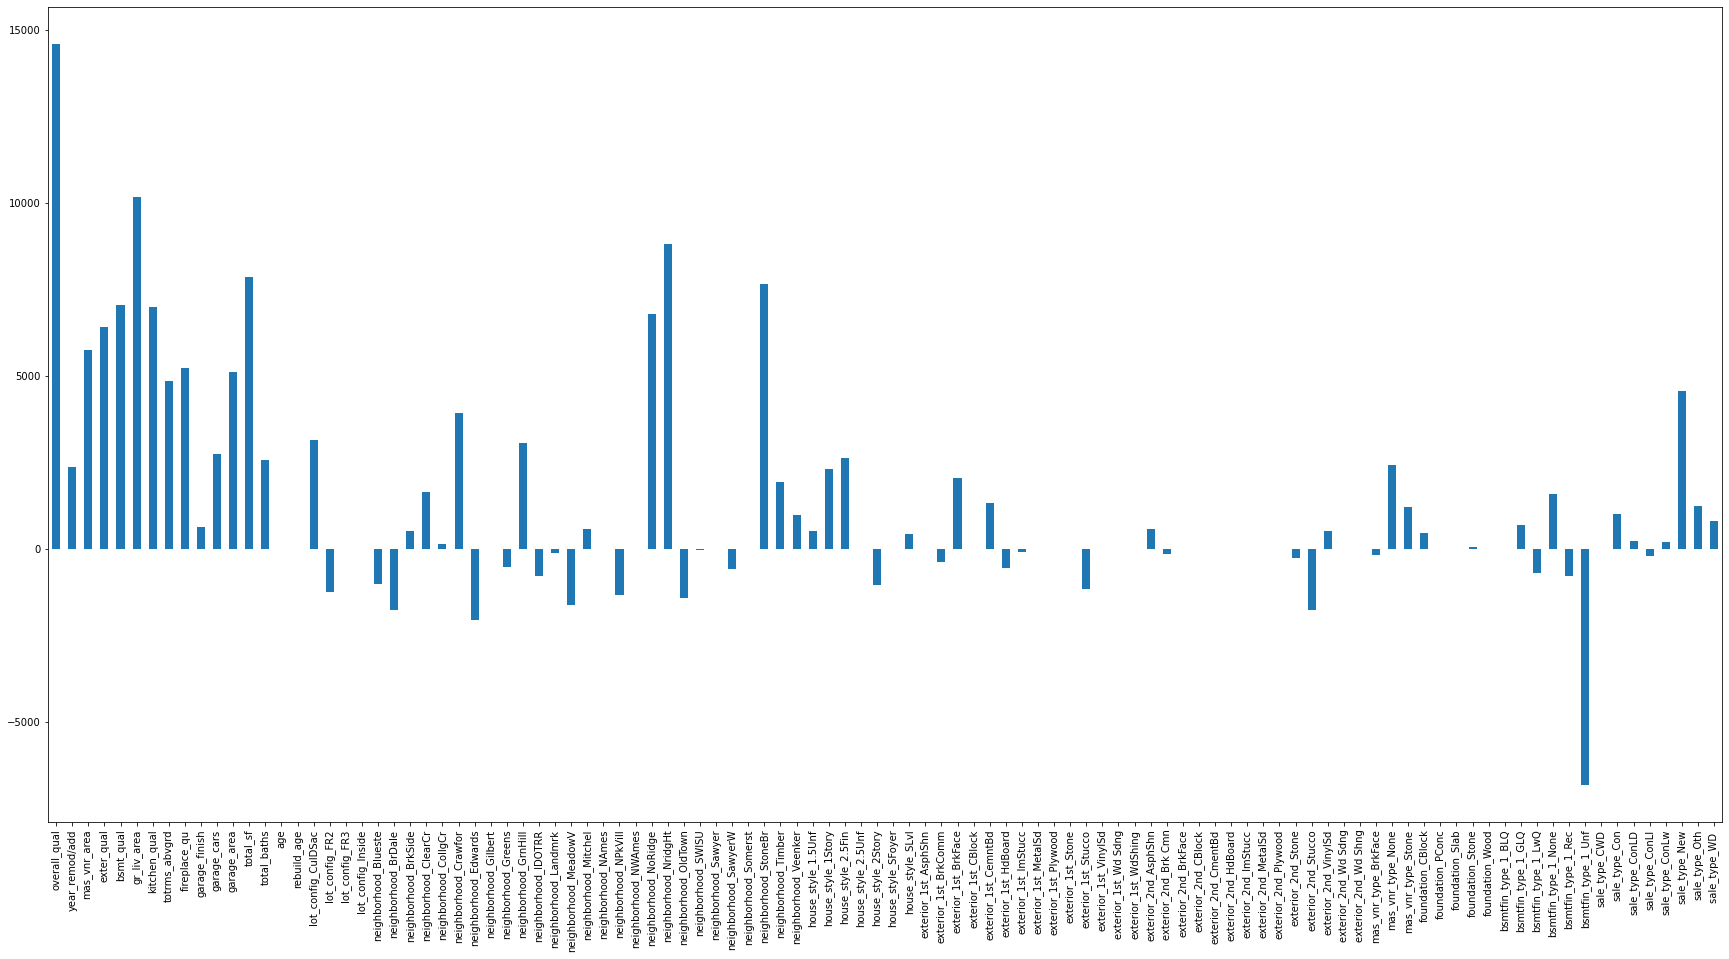

In [97]:
pd.Series(lasso.coef_, index=features).plot.bar(figsize=(30,15))

## Run another model keeping non  zero coef lasso coeffient features

## MODEL 2

In [98]:
# Created a function to find the zero coeff features
lasso_coefs = lasso.coef_
shortlisted_vars = []
for i,value in enumerate(lasso_coefs):
    if value > 0:
        shortlisted_vars.append(features[i])

In [99]:
# Defind the X predictor and y predict
X= train[shortlisted_vars]
y= train['saleprice']

In [100]:
# Run the train test split on the training data  
X_train, X_val,y_train,y_val = train_test_split(X,y,random_state=42)

In [101]:
# fit a standard scaler to X_train and transform both X_train and X_test
ss =StandardScaler()
ss.fit(X_train)
X_train_ss = ss.transform(X_train)
X_val_ss = ss.transform(X_val)

In [102]:
# Linear Regression
lr.fit(X_train_ss,y_train)
lr_scores = cross_val_score(lr, X_train_ss, y_train, cv=5)
lr_cv_mse_scores = -cross_val_score(lr, X_train_ss, y_train, cv=5, scoring = 'neg_mean_squared_error')
print(lr_scores.mean())
print(lr_cv_mse_scores.mean())

0.8199021135579688
1116887221.4027064


In [103]:
# Find optimal value for lasso regression alpha
optimal_lasso = LassoCV(n_alphas=100, cv=10, verbose=1)
optimal_lasso.fit(X_train_ss, y_train)

print (optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

83.66391393120605


...............................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished


In [104]:
# Lasso Model
lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso_scores = cross_val_score(lasso, X_train_ss, y_train, cv=5)
print(lasso_scores.mean())
lasso_cv_mse_scores = -cross_val_score(lasso,X_train_ss,y_train,cv=5, scoring ='neg_mean_squared_error')
print(ridge_cv_mse_scores.mean())

0.8202744811735603
1071688857.5477035


In [105]:
# Refit outside cross_val_score
lasso.fit(X_train_ss, y_train)

# coefficients for variables in the Lasso
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

,variable,coef,abs_coef
0,overall_qual,13255.675729,13255.675729
5,gr_liv_area,10841.358022,10841.358022
22,neighborhood_NridgHt,9530.533096,9530.533096
23,neighborhood_StoneBr,8390.222096,8390.222096
12,total_sf,7496.444771,7496.444771
4,bsmt_qual,7487.550357,7487.550357
21,neighborhood_NoRidge,7413.754634,7413.754634
6,kitchen_qual,7014.398295,7014.398295
43,sale_type_New,6157.411982,6157.411982
2,mas_vnr_area,6122.176085,6122.176085


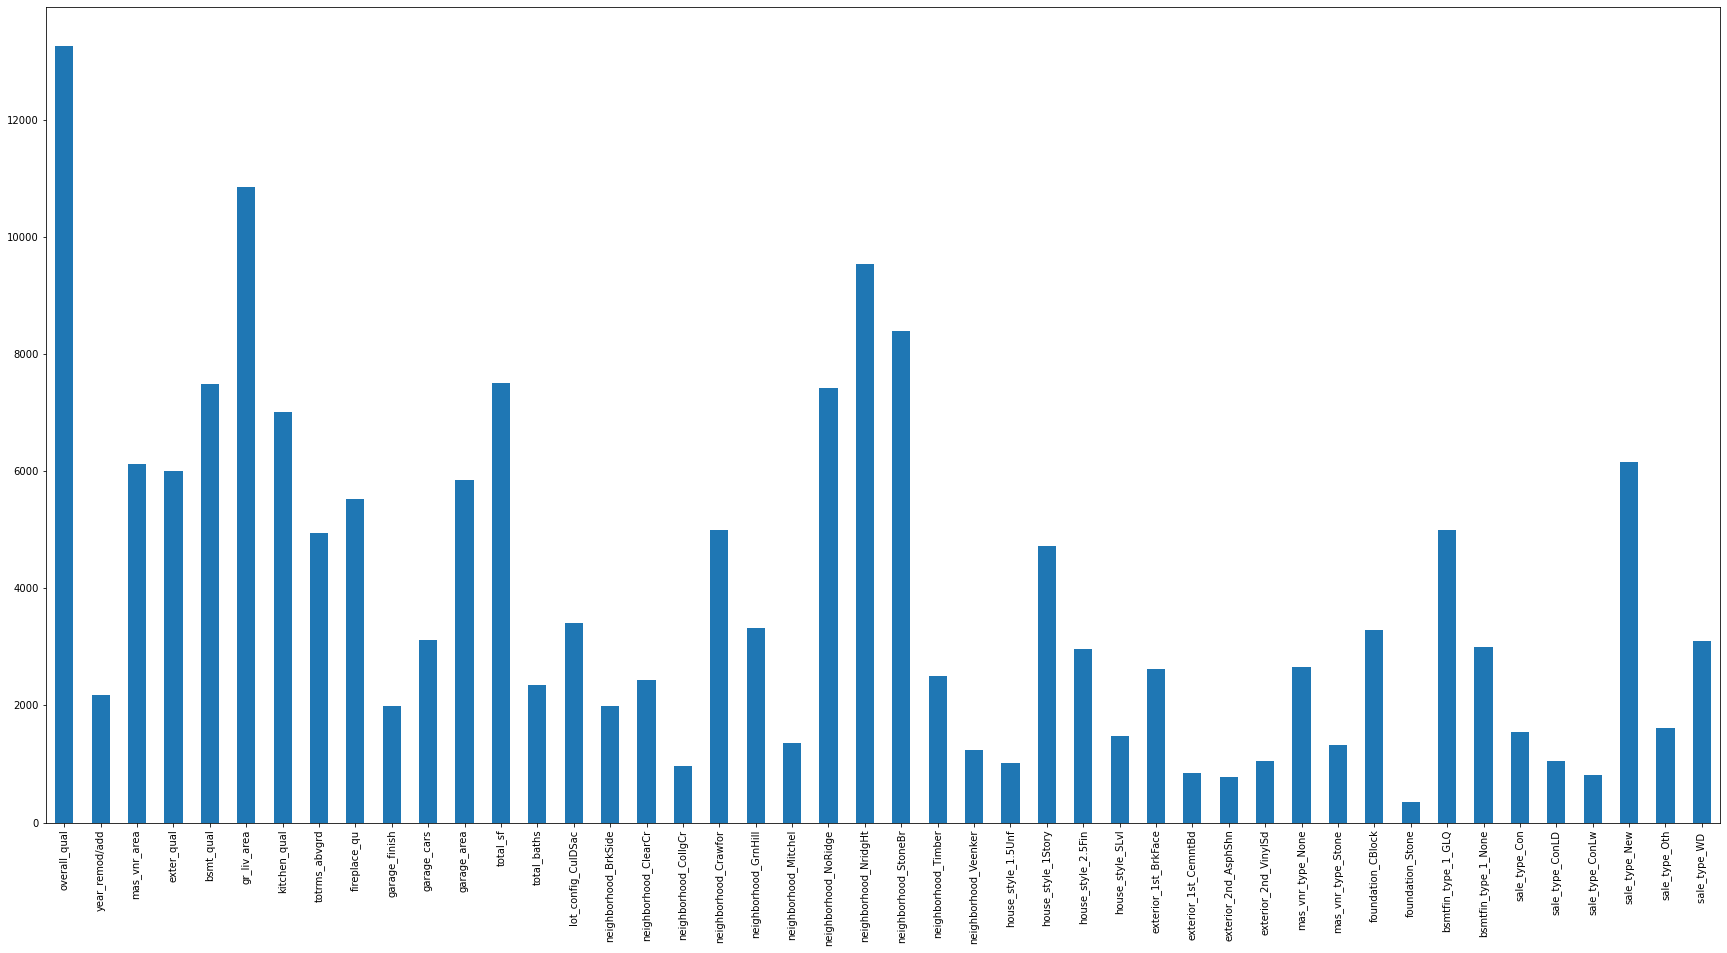

In [106]:
pd.Series(lasso.coef_,index= shortlisted_vars).plot.bar(figsize=(30,15))

#### Observation: 
The mean R^2 of Linear Regression model improve alot by minimizing collinear features .

The Lasso here performs only slightly better. Lasoo helps in feature selection which of valuable variables, so by elimination the feature doesn't help lasso R2

## Inferential Visualizations

In [107]:
# Fit the model 
lasso.fit(X_train_ss, y_train)
lasso.score(X_train_ss, y_train)

0.8483632787908504

In [108]:
#Predict target values
pred = lasso.predict(X_val_ss)
r2_score(y_val, pred)

0.8597455290088069

1. Model Fitting and Evaluate

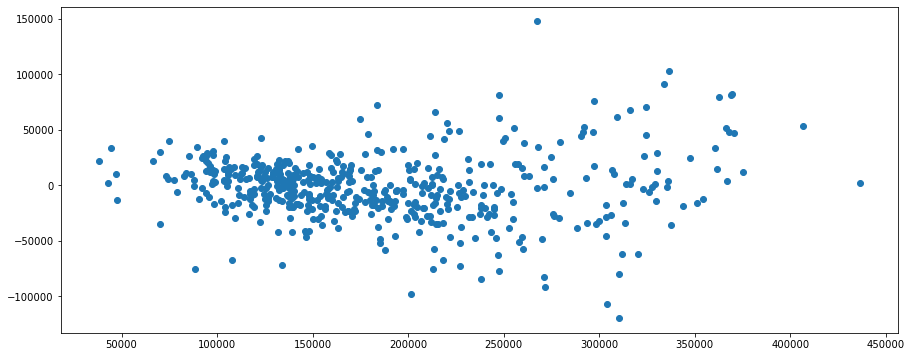

In [109]:
#Plot of the Errors
residuals = y_val - pred

plt.figure(figsize=(15,6))
plt.scatter(pred, residuals);

In [110]:
#Predict target values
pred = lasso.predict(X_val_ss)
r2_score(y_val, pred)

0.8597455290088069

### TEST DATA 

In [111]:
# Imputate gagare features
test['garage_area'].fillna(0.0,inplace=True)
test['garage_cars'].fillna(0.0,inplace=True)

# Imputate basement Nominal features
lst = ['bsmt_half_bath','bsmt_full_bath','bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf']
for i in lst:
    test[i] = test[i].fillna(0.0, inplace=True)

# Imputate the masonary vaneer type 
test['mas_vnr_type'] = test['mas_vnr_type'].fillna("None")
test['mas_vnr_area'] = test['mas_vnr_area'].fillna(0.0)

# Imputate Basement features
lst =['bsmt_exposure','bsmtfin_type_2','bsmtfin_type_1','bsmt_qual','bsmt_cond']
for i in lst:
    test[i].fillna('None', inplace= True)

# Imputating Garage Condition    
lst=['garage_cond','garage_finish','garage_qual','garage_type']
# Imputating the null values to None for ordinal n ordered features:
for i in lst:
    test[i].fillna('None',inplace=True)

# Imputed to null for build year
test['garage_yr_blt'].fillna(0.0,inplace=True)

# Lot frontage mean value
mean = np.mean(test['lot_frontage'])
test["lot_frontage"].fillna(mean, inplace = True)

# Imputate other features with null value 
test["alley"].fillna("None", inplace = True)
test["fence"].fillna("No", inplace = True)
test["misc_feature"].fillna("NA", inplace = True)
test["pool_qc"].fillna("None", inplace = True)
test["fireplace_qu"].fillna("None", inplace = True)

  
# Ordinal to numeric data for other categorical features
lst =['fence','lot_shape','utilities','land_slope','electrical','paved_drive','garage_finish']


# Mapping the the numerical values
for i in lst_ordinal:
        test[i] = test[i].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
# Bst_Exposure Imputation.
test['bsmt_exposure'] = test['bsmt_exposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'None':0})

# Ordinal to numeric data for other categorical features
lst =['fence','lot_shape','utilities','land_slope','electrical','paved_drive','garage_finish']


# Imputating the ordinal features 
test['fence'] = test['fence'].map({'No':0, 'MnWw': 1, 'GdWo': 2, 'MnPrv':3, 'GdPrv':4})
test['lot_shape'] = test['lot_shape'].map({'IR3':1, 'IR2':2, 'IR1':3, 'Reg':4})
test['utilities'] = test['utilities'].map({'NoSeWa':1, 'NoSewr':2, 'AllPub':3})
test['land_slope'] = test['land_slope'].map({'Sev':1, 'Mod':2, 'Gtl':3})
test['electrical'] = test['electrical'].map({'Mix':1, 'FuseP':2, 'FuseF':3, 'FuseA':4, 'SBrkr':5})
test['paved_drive'] = test['paved_drive'].map({'N':0, 'P':1, 'Y':2})
test['garage_finish'] = test['garage_finish'].map({'None':0, 'Unf':1, 'RFn':2, 'Fin':3})

# Created a total surface area feature 
test["total_sf"] = test["total_bsmt_sf"] + test["1st_flr_sf"] + test["2nd_flr_sf"]

#calculating overall number of bathrooms
test["total_baths"] = test["full_bath"] + test["half_bath"]

# Created a feature with age and rebuld_age 
test['age'] = (test['yr_sold'] - test['year_built'])
test['rebuild_age'] = (test['yr_sold'] - test['year_remod/add'])

# List of numerical feature< +/- 
drop_list = ['lot_shape','fence','enclosed_porch','kitchen_abvgr','overall_cond','ms_subclass','land_slope','bsmt_half_bath',
             'low_qual_fin_sf','yr_sold' ,'misc_val','bsmtfin_sf_2','pool_qc','mo_sold','exter_cond','3ssn_porch',
             'screen_porch','bedroom_abvgr','bsmt_unf_sf','bsmt_cond','electrical',
              '2nd_flr_sf','garage_cond','half_bath','bsmt_full_bath','garage_qual','paved_drive','lot_area',
               'wood_deck_sf','open_porch_sf','bsmtfin_sf_1','bsmt_exposure','heating_qc','fireplaces']

test.drop(drop_list,axis=1, inplace= True)

# Drop the features with vary low variance with saleprice
list_cat = ['alley','central_air','misc_feature']
test.drop(list_cat, axis=1, inplace=True)

#Create dummies for categorical variables

test = pd.get_dummies(test, columns=['ms_zoning','street', 
                                        'land_contour','lot_config',
                                        'neighborhood','condition_1','condition_2','bldg_type',
                                        'house_style','roof_style','roof_matl','exterior_1st',
                                        'exterior_2nd','mas_vnr_type','foundation','bsmtfin_type_1',
                                        'bsmtfin_type_2','heating',
                                        'functional','garage_type','garage_finish',
                                        'sale_type'
                                         ], drop_first=True)

In [112]:
test.shape

(879, 167)

In [113]:

# As only certain columns are used to run the models, 
# we will be looking at the features instead
features = [col for col in train._get_numeric_data().columns if col != 'saleprice']

missing_features = [col for col in features if ~np.isin(col,test.columns)]
missing_features

['garage_finish',
 'neighborhood_GrnHill',
 'neighborhood_Landmrk',
 'exterior_1st_CBlock',
 'exterior_1st_ImStucc',
 'exterior_1st_Stone',
 'exterior_2nd_Stone']

In [114]:
test = pd.concat([test, pd.DataFrame(columns = missing_features)]).fillna(0)
test[features].shape

(879, 104)

## MODEL 2 submission to Kaggle 

In [115]:
#features = [col for col in df_test._get_numeric_data().columns if col != 'saleprice']
prediction = test[shortlisted_vars]
X_test_ss = ss.transform(test[shortlisted_vars])
test['saleprice'] = lasso.predict(X_test_ss)
test['id'] = test.index
kaggle_submission_2 = test[['saleprice']]

In [116]:
kaggle_submission_2.to_csv('./datasets/kaggle_submission_2.csv')

## Conclusions and Recommendations

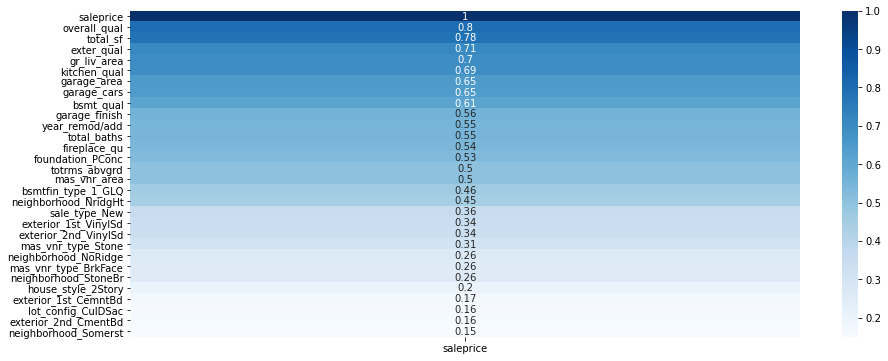

In [117]:
# Variables has highest positive correlation against Sale Price
plt.figure(figsize = (15,6))
train_corr = train.corr()[['saleprice']].sort_values('saleprice', ascending=False)
positive_corr = train_corr.head(30)

sns.heatmap(positive_corr, annot = True, cmap='Blues');


In order to have a model that predicts the price of a house accuratly, we will need to first clean up our data with the help of Exploratory Data Analysis. We will be looking at data for completeness through imputation of the null values, converting discrete, continous, ordinal and nominal values in variables. 

#### Feature Exploration

- With Seaborn Heatmap, we will be able to identify which features are of the highest correlation with saleprice.
- Pairplot allow us to take a close look at the correlation and the distribution
- Boxplot help to identify the key Categorical features

Which features appear to add the most value to a home?

Feature Correlation with Sale price with a significant positive correlation of more than 0.5

 - Overall quality (0.81)
 - Total square feet (0.78)
 - External quality (0.71)
 - Ground Living Area (0.7)
 - kitchen quality(0.69) 
 -  garage area (0.65)

Which features hurt the value of a home the most?
- Feature Correlation with Sale price with a significant negative correlation of less than than -0.6 1.Housing age (-0.58)

What modeling approaches yield the most accurate prediction?

 Below are steps to find the accurate prediction:
- Genrating Dummy variables: Replace catergorical variables
- Ordinal Values: Assigning values to those scaled variables with the use of mapping.
- Train test split
- Comparison between linear regression, lasso and Ridge Regression Model

Which Categorical features appear to add the most value to a home

- Neighbourhood_NridgHt
- Neighbourhood_StoneBr
- Neighbourhood_NoRidge
- Sale-type_new
- House Style_1stStory


Which model has the best prediction? 
  - Lasso has the highest accurate prediction whcih are R^2 score of 85% on the test Prediction.Lasso helps in feature      selection as it tends to make coefficients to absolute zero as compared to Ridge which never sets the value of coefficient to absolute zero. 

What are things that homeowners could improve in their homes to increase the value?

 - As age of the house can hurt the value of a home hence, remodelling might come in handy if homeowners are planning to
    increase the  value.
 - Other Recommendation Rather than only looking at the features of a property, there are other factors that might affect      the sale price.

 This to consider to further investigate that may help to predict the price of property even more accurately.
For instance, a recession or a pandemic might cause a drop in the sale price due to supply and demand.

Linear regression allows us to be able to predict the price of a house using various factors. Additionally, it enables one to be able to measure the influence of a factor onto the price of a house, how strong of an influence it has on the price as well as the direction of influence, positive or negative.
